In [1]:
import sys, torch
print(sys.executable)
print("Torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())

/home/syed-mohammed-bilal/.local/share/mamba/envs/office_ssl/bin/python
Torch version: 2.5.1
CUDA available: True


In [2]:
#imports
# Cell 1 - Imports
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import random
import torchvision.transforms as T

In [16]:
#path to the unlabeled dataset
from pathlib import Path

data_dir = Path.home() / "projects/office-ssl/data/unlabeled/office_dataset"

In [17]:
#checking if it exists
data_dir.exists()

True

In [18]:
#inspecting the data inside
img_paths = list(data_dir.rglob('*.png'))
print(f"Found {len(img_paths)} .png images in {data_dir}")


Found 1523 .png images in /home/syed-mohammed-bilal/projects/office-ssl/data/unlabeled/office_dataset


In [19]:
#class inspection
for folder in sorted(p.name for p in data_dir.iterdir() if p.is_dir()):
    print(folder, "→", len(list((data_dir/folder).glob('*.png'))), "images")

Angela → 245 images
Dwight → 263 images
Jim → 275 images
Kevin → 205 images
Michael → 286 images
Pam → 249 images


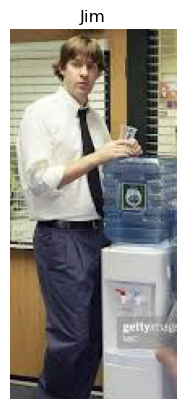

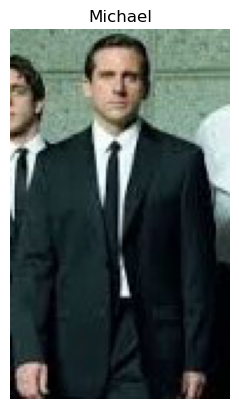

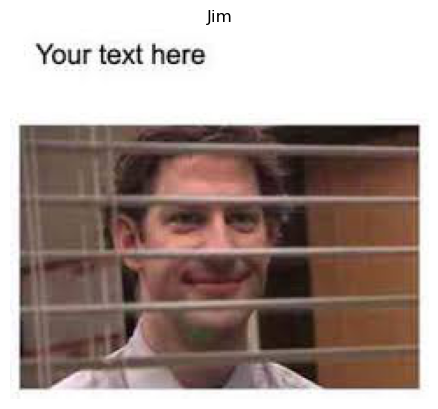

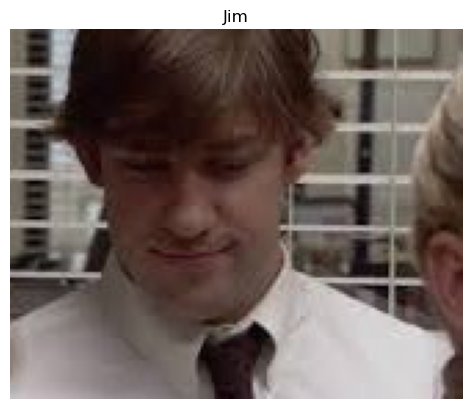

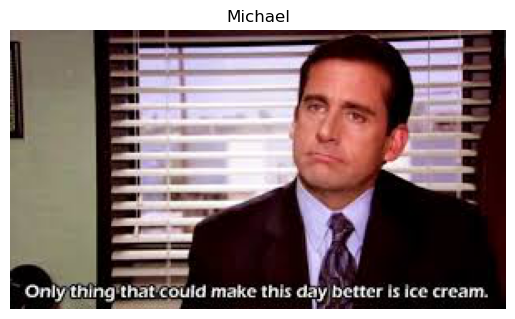

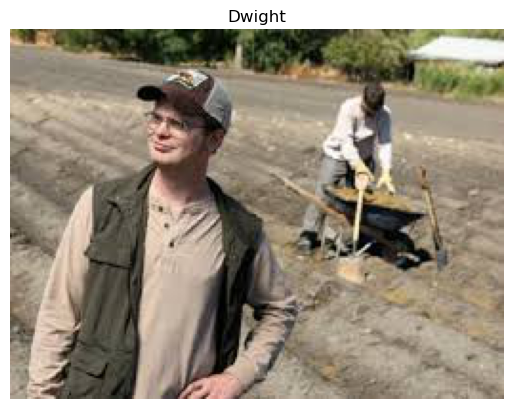

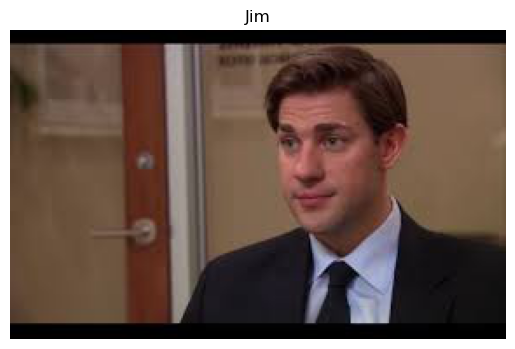

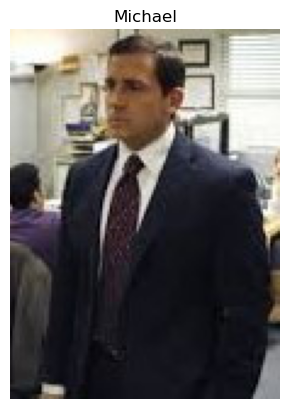

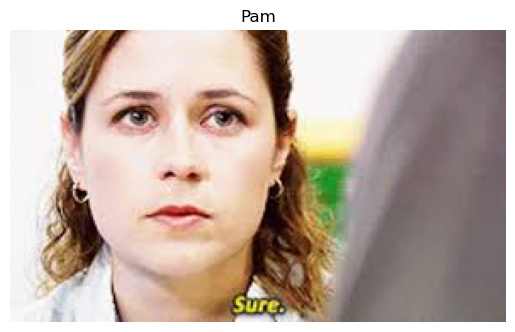

In [20]:
#sampling images from the dataset
import random
from PIL import Image
import matplotlib.pyplot as plt

n_samples = min(9, len(img_paths))
for p in random.sample(img_paths, n_samples):
    img = Image.open(p).convert('RGB')
    plt.imshow(img)
    plt.title(p.parent.name)  # shows folder (character name)
    plt.axis('off')
    plt.show()


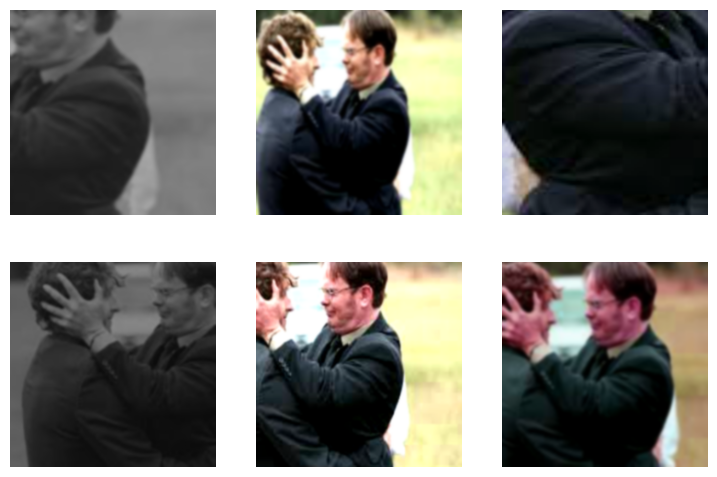

In [21]:
#visualize simCLR augmentation
augment = T.Compose([
    T.RandomResizedCrop(224, scale=(0.08, 1.0)),
    T.RandomHorizontalFlip(p=0.5),
    T.ColorJitter(0.4, 0.4, 0.4, 0.1),
    T.RandomGrayscale(p=0.2),
    T.GaussianBlur(kernel_size=23),
    T.ToTensor()
])

p = random.choice(img_paths)
img = Image.open(p).convert('RGB')
fig, axes = plt.subplots(2,3, figsize=(9,6))
for i, ax in enumerate(axes.flat):
    ax.imshow(augment(img).permute(1,2,0).clip(0,1))
    ax.axis('off')
plt.show()
